## 정제된 데이터 분석

In [2]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

import operator
import re

In [3]:
dataset = pd.read_csv('./data/articles_essential_refined.csv', encoding='utf-8')
dataset.head()

,title,author,year,vol,no,keyword,abstract
0,예술치료사 자기효능감 척도 개발 및 타당화 연구,"김 영 신 , 김동민",2019,21,21,"예술치료, 자기효능감, 예술치료사 자기효능감 척도, 타당화",본 연구에서는 예술치료사의 전문적 자기효능감을 측정할 수 있는 예술치료사 자기효능감...
1,델파이 방법을 통한 국내 재활음악치료 발전방안 연구,박환영,2019,21,21,"재활음악치료, 발전방안, 델파이","본 연구는 델파이 방법을 통하여 국내 재활분야에서 음악치료의 현재 위치를 인식하고,..."
2,음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰에 대한 자문화기술지,"이 혜 민 , 소혜진",2019,21,21,"음악치료사, 치료사 훈련과정, 열등감, 자문화기술지",본 연구는 한 개인 음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰을 고찰하는 ...
3,호스피스ㆍ완화의료 환자를 대상으로 한 국내ㆍ외 음악치료 연구 메타분석,"최혜진 , 황은영",2019,21,21,"호스피스ㆍ완화의료, 음악치료, 메타분석",본 연구는 메타분석을 통해 호스피스ㆍ완화의료 환자를 대상으로 한 음악치료의 전체효과...
4,수퍼바이지가 지각하는 음악치료 전문성과 수퍼비전 교육요구에 대한 합의적 질적연구,"김동민 , 정 종 현 , 소라엘 , 최지엘 , 김 영 신",2019,21,21,"음악치료사, 발달, 전문성, 수퍼비전, 수퍼바이지, 합의적 질적연구",본 연구는 수퍼바이지가 지각하는 음악치료 전문성 요인을 탐색하고 이를 발달시키기 위...


In [4]:
dataset_drop = dataset.copy()
dataset_drop = dataset.drop(['vol', 'no'], axis=1)
dataset_drop.head()

,title,author,year,keyword,abstract
0,예술치료사 자기효능감 척도 개발 및 타당화 연구,"김 영 신 , 김동민",2019,"예술치료, 자기효능감, 예술치료사 자기효능감 척도, 타당화",본 연구에서는 예술치료사의 전문적 자기효능감을 측정할 수 있는 예술치료사 자기효능감...
1,델파이 방법을 통한 국내 재활음악치료 발전방안 연구,박환영,2019,"재활음악치료, 발전방안, 델파이","본 연구는 델파이 방법을 통하여 국내 재활분야에서 음악치료의 현재 위치를 인식하고,..."
2,음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰에 대한 자문화기술지,"이 혜 민 , 소혜진",2019,"음악치료사, 치료사 훈련과정, 열등감, 자문화기술지",본 연구는 한 개인 음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰을 고찰하는 ...
3,호스피스ㆍ완화의료 환자를 대상으로 한 국내ㆍ외 음악치료 연구 메타분석,"최혜진 , 황은영",2019,"호스피스ㆍ완화의료, 음악치료, 메타분석",본 연구는 메타분석을 통해 호스피스ㆍ완화의료 환자를 대상으로 한 음악치료의 전체효과...
4,수퍼바이지가 지각하는 음악치료 전문성과 수퍼비전 교육요구에 대한 합의적 질적연구,"김동민 , 정 종 현 , 소라엘 , 최지엘 , 김 영 신",2019,"음악치료사, 발달, 전문성, 수퍼비전, 수퍼바이지, 합의적 질적연구",본 연구는 수퍼바이지가 지각하는 음악치료 전문성 요인을 탐색하고 이를 발달시키기 위...


In [5]:
dataset_author = dataset_drop.copy()
dataset_author['author'] = dataset_author['author'].str.replace(', ', ',')
dataset_author['author'] = dataset_author['author'].str.split(',')
sr_author = dataset_author['author']

for idx in range(sr_author.shape[0]):
    author_refined = list()
    for author in sr_author.iloc[idx]:
        author = author.replace(' ', '')
        author = author.replace('(', '')
        author = author.replace(')', '')
        author = author.replace('-', '')
        author_refined.append(author)
    sr_author.iloc[idx] = author_refined
dataset_author['author'] = sr_author
dataset_author.head(60)

/Users/dhsong/Workspaces/Music Therapy NLP Project/Pycharm Project/venv/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,title,author,year,keyword,abstract
0,예술치료사 자기효능감 척도 개발 및 타당화 연구,"[김영신, 김동민]",2019,"예술치료, 자기효능감, 예술치료사 자기효능감 척도, 타당화",본 연구에서는 예술치료사의 전문적 자기효능감을 측정할 수 있는 예술치료사 자기효능감...
1,델파이 방법을 통한 국내 재활음악치료 발전방안 연구,[박환영],2019,"재활음악치료, 발전방안, 델파이","본 연구는 델파이 방법을 통하여 국내 재활분야에서 음악치료의 현재 위치를 인식하고,..."
2,음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰에 대한 자문화기술지,"[이혜민, 소혜진]",2019,"음악치료사, 치료사 훈련과정, 열등감, 자문화기술지",본 연구는 한 개인 음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰을 고찰하는 ...
3,호스피스ㆍ완화의료 환자를 대상으로 한 국내ㆍ외 음악치료 연구 메타분석,"[최혜진, 황은영]",2019,"호스피스ㆍ완화의료, 음악치료, 메타분석",본 연구는 메타분석을 통해 호스피스ㆍ완화의료 환자를 대상으로 한 음악치료의 전체효과...
4,수퍼바이지가 지각하는 음악치료 전문성과 수퍼비전 교육요구에 대한 합의적 질적연구,"[김동민, 정종현, 소라엘, 최지엘, 김영신]",2019,"음악치료사, 발달, 전문성, 수퍼비전, 수퍼바이지, 합의적 질적연구",본 연구는 수퍼바이지가 지각하는 음악치료 전문성 요인을 탐색하고 이를 발달시키기 위...
5,A Twenty-year Historical Report: Music Therapy...,[최병철ChoiByungchuel],2019,"music therapy in Korea , twenty-year history ,...",비교적 짧은 20년의 역사를 가진 한국 음악치료 교육은 일반의 인식을 높여옴과 동시...
6,The Korean Journal of Music Therapy: Commemora...,[DeniseGrocke],2019,"historical perspective , Korean Journal of Mus...",한국음악치료학회지는 1999년 첫 발간을 시작으로 올해 20주년을 맞이하였다. 19...
7,예술치료사 발달평가 척도 개발 및 타당화 연구,"[김동민KimDongMin, 김영신KimYoungshin]",2019,"예술치료사 , 발달 , 예술치료사 발달평가척도 , 타당화 , creative art...",본 연구에서는 예술치료사의 고유한 전문성 발달을 측정할 수 있는 예술치료사 발달평가...
8,산모의 노래 중재가 고위험 신생아의 신체사정지수와 산모의 정서변화에 미치는 영향,"[주지은JuJiEun, 이진아LeeJinA, 김도현KimDoHyun, 김민희KimM...",2019,"고위험 신생아 , 산모 , 신체사정지수 , 자장가 , 정서변화 , high-risk...","본 연구는 산모의 자장가 노래를 고위험 신생아에게 들려줄 때 심박동수, 호흡수, 산..."
9,정신과 입원환자를 대상으로 한 노래 만들기에서 도출된 노래가사 분석,"[오선화OhSunHwa, 문지영MoonJiYoung]",2019,"정신질환 , 노래 만들기 , 노래 가사분석 , 혼합된 내용 분석 , 귀납적 분석 ,...",본 연구의 목적은 E병원에 입원한 정신과 환자들이 만든 노래 70곡의 가사 분석을 ...


In [6]:
dataset_keyword = dataset_author.copy()
dataset_keyword['keyword'] = dataset_keyword['keyword'].str.replace(', ', ',')
dataset_keyword['keyword'] = dataset_keyword['keyword'].str.split(',')
sr_keyword = dataset_keyword['keyword']
for idx in sr_keyword.index:
    sr_keyword.loc[idx] = [k.strip() for k in sr_keyword.loc[idx]]
dataset_keyword.head()

,title,author,year,keyword,abstract
0,예술치료사 자기효능감 척도 개발 및 타당화 연구,"[김영신, 김동민]",2019,"[예술치료, 자기효능감, 예술치료사 자기효능감 척도, 타당화]",본 연구에서는 예술치료사의 전문적 자기효능감을 측정할 수 있는 예술치료사 자기효능감...
1,델파이 방법을 통한 국내 재활음악치료 발전방안 연구,[박환영],2019,"[재활음악치료, 발전방안, 델파이]","본 연구는 델파이 방법을 통하여 국내 재활분야에서 음악치료의 현재 위치를 인식하고,..."
2,음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰에 대한 자문화기술지,"[이혜민, 소혜진]",2019,"[음악치료사, 치료사 훈련과정, 열등감, 자문화기술지]",본 연구는 한 개인 음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰을 고찰하는 ...
3,호스피스ㆍ완화의료 환자를 대상으로 한 국내ㆍ외 음악치료 연구 메타분석,"[최혜진, 황은영]",2019,"[호스피스ㆍ완화의료, 음악치료, 메타분석]",본 연구는 메타분석을 통해 호스피스ㆍ완화의료 환자를 대상으로 한 음악치료의 전체효과...
4,수퍼바이지가 지각하는 음악치료 전문성과 수퍼비전 교육요구에 대한 합의적 질적연구,"[김동민, 정종현, 소라엘, 최지엘, 김영신]",2019,"[음악치료사, 발달, 전문성, 수퍼비전, 수퍼바이지, 합의적 질적연구]",본 연구는 수퍼바이지가 지각하는 음악치료 전문성 요인을 탐색하고 이를 발달시키기 위...


#### 저자 단위 분석

* 저자 이름이 정제되어 있지 않으므로 저자 단위의 분석이 크게 효과적이지 않음

In [7]:
author_freq = dict()
for authors in dataset_keyword['author']:
    for author in authors:
        if author not in author_freq.keys():
            author_freq[author] = 1
        else:
            author_freq[author] += 1

authors = list(sorted(author_freq.keys()))
frequency = list(author_freq[a] for a in authors)

print(authors)
print(frequency)

df_author_freq = pd.DataFrame(zip(authors, frequency), columns=['author', 'frequency'])
df_author_freq.head()

['BumSuk', 'Byungchuel', 'Choi', 'DeniseGrocke', 'DongMin', 'EunA', 'EunHye', 'EunJin', 'EunYoung', 'HaeWon', 'JiYoung', 'MiHyun', 'MinHye', 'SuHyun', 'Yang', 'Youngshin', 'Yuna', 'kyungsuk', '강경선', '강아림', '고명한', '고범석', '고범석Ko', '고은진', '고은진Ko', '곽은주', '곽현정', '김경숙', '김경혜', '김경희', '김다영', '김도현KimDoHyun', '김동민', '김동민Kim', '김동민KimDongMin', '김두연', '김미애', '김미향', '김민경', '김민정', '김민희KimMinHee', '김선하', '김선화', '김선희', '김성렬', '김성희', '김수현Kim', '김수희', '김영신', '김영신Kim', '김영신KimYoungshin', '김영은', '김영후', '김은영', '김은정', '김은주', '김인경', '김자현', '김지애', '김지연', '김지현', '김향숙', '김희경', '남궁지숙', '남민', '류리', '명온', '문서란', '문소영', '문정표', '문지영', '문지영Moon', '문지영MoonJiYoung', '민경선MinKyungsun', '박소연', '박소영', '박은경', '박지선', '박지은', '박진아', '박현경', '박혜인', '박환영', '배미현Bae', '백경실', '변재선', '서경희', '성인영', '소라엘', '소혜진', '소혜진SoHyejin', '손정태', '안소윤', '양은아', '여정윤', '오선경', '오선화', '오선화OhSunHwa', '오소희OhSoHee', '위아름', '유민혜Yoo', '유지형', '윤선영', '윤영지', '이경숙', '이경숙Lee', '이경희', '이난복', '이다연', '이상은', '이선민', '이수경', '이수정', '이숙', '이연수LeeYeonSoo', '이영화', '이윤지

,author,frequency
0,BumSuk,1
1,Byungchuel,1
2,Choi,1
3,DeniseGrocke,1
4,DongMin,2


* 저자 이름을 기준으로 분석을 시도하였으나, 이름이 통일되지 않았으며 심지어 영문 이름과 통합됨
* comma(,)를 기준으로 나누려고 시도했으나 Yang, EunA와 같이 자동적으로 구분하기 어려운 문제에 대해서 Yang과 EunA로 중복 카운팅됨
* 이를 해결하기 위해서는 고유한 논문의 수를 set으로 구한 이후 이를 list로 변환해서 수를 계산하는 것을 시도해볼 수는 있음

#### 연도 단위 분석

In [8]:
year = dataset_keyword['year'].value_counts().index
freq = dataset_keyword['year'].value_counts().values
year_freq = dict()
for y, f in zip(year, freq):
    year_freq[y] = f
year_freq = sorted(year_freq.items())
year_freq

[(1999, 4),
 (2000, 4),
 (2001, 7),
 (2002, 6),
 (2003, 6),
 (2004, 10),
 (2005, 12),
 (2006, 8),
 (2007, 9),
 (2008, 9),
 (2009, 14),
 (2010, 12),
 (2011, 11),
 (2012, 8),
 (2013, 10),
 (2014, 9),
 (2015, 7),
 (2016, 14),
 (2017, 11),
 (2018, 15),
 (2019, 14)]

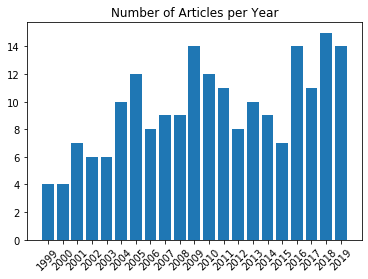

In [9]:
year = list()
freq = list()
for y, f in year_freq:
    year.append(y)
    freq.append(f)
plt.bar(year, freq)
plt.xticks(year, rotation=45)
plt.title('Number of Articles per Year')
plt.show()

* 2009년 이후 감소하는 경향과 2016년 이후 증가하는 경향
* 최근에는 2017년을 제외하고는 상당히 많은 논문 수 제출됨

#### 키워드 단위 분석

In [10]:
keyword_freq = dict()
sr_keyword = dataset_keyword['keyword']
for idx in range(sr_keyword.shape[0]):
    lst_keyword = sr_keyword.iloc[idx]
    for k in lst_keyword:
        if k not in keyword_freq.keys():
            keyword_freq[k] = 1
        else:
            keyword_freq[k] += 1
keys = list()
vals = list()
keyword_freq = sorted(keyword_freq.items(), key=operator.itemgetter(1), reverse=True)
for k, v in keyword_freq:
    keys.append(k)
    vals.append(v)
    
df_keyword_frequency = pd.DataFrame(zip(keys, vals), columns=['keyword', 'frequency'])
df_keyword_frequency.to_csv('./data/keyword_frequency.csv', index=False, encoding='utf-8')
df_keyword_frequency

,keyword,frequency
0,음악치료,30
1,음악치료사,27
2,music therapy,27
3,MV,27
4,music therapist,20
...,...,...
903,기분 반응,1
904,기분 일치성 기억회상,1
905,아동 선호,1
906,템포,1


In [165]:
df_keyword_frequency_nomv = df_keyword_frequency.copy()
df_keyword_frequency_nomv = df_keyword_frequency_nomv.drop(3, axis=0)
df_keyword_frequency_nomv

,keyword,frequency
0,음악치료,30
1,음악치료사,27
2,music therapy,27
4,music therapist,20
5,메타분석,9
...,...,...
903,기분 반응,1
904,기분 일치성 기억회상,1
905,아동 선호,1
906,템포,1


In [166]:
df_keyword_frequency_kor = df_keyword_frequency_nomv.copy()
sr_keyword = df_keyword_frequency_kor['keyword']
for idx in sr_keyword.index:
    keyword = sr_keyword.loc[idx]
    eng = re.compile('[a-zA-Z]+')
    if eng.search(keyword):
        df_keyword_frequency_kor = df_keyword_frequency_kor.drop(idx, axis=0)
df_keyword_frequency_kor.to_csv('./data/dictionary_full.tsv', sep='\t', encoding='utf-8', index=False)
df_keyword_frequency_kor

,keyword,frequency
0,음악치료,30
1,음악치료사,27
5,메타분석,9
6,현상학적 연구,9
7,불안,7
...,...,...
903,기분 반응,1
904,기분 일치성 기억회상,1
905,아동 선호,1
906,템포,1


In [180]:
df_keyword_frequency_noone = df_keyword_frequency_kor.copy()
df_keyword_frequency_noone = df_keyword_frequency_noone[df_keyword_frequency_noone['frequency'] > 1]
df_keyword_frequency_noone.to_csv('./data/dictionary.tsv', sep='\t', encoding='utf-8', index=False)
df_keyword_frequency_noone

,keyword,frequency
0,음악치료,30
1,음악치료사,27
5,메타분석,9
6,현상학적 연구,9
7,불안,7
...,...,...
140,대중음악,2
142,선호,2
143,감상,2
144,노래 부르기,2


#### 연도별 키워드 분석

In [169]:
target_keyword = df_keyword_frequency_noone['keyword'].to_list()
target_keyword[:10]

['음악치료',
 '음악치료사',
 '메타분석',
 '현상학적 연구',
 '불안',
 '효과크기',
 '스트레스',
 '음악활동',
 '평가도구',
 '질적 연구']

In [172]:
target_year = list(dataset_keyword['year'].unique())
target_year[:10]

[2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

In [181]:
year_keyword = dict()
for year in target_year:
    year_keyword[year] = dict()
    for keyword in target_keyword:
        year_keyword[year][keyword] = 0

    sr_keyword = dataset_keyword[dataset_keyword['year'] == year]['keyword']
    for idx in sr_keyword.index:
        for k in sr_keyword.loc[idx]:
            if k in target_keyword:
                year_keyword[year][k] += 1
df_year_keyword = pd.DataFrame(year_keyword)
df_year_keyword.to_csv('./data/keyword_year.csv', encoding='utf-8', index=True)
df_year_keyword

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
음악치료,1,3,2,3,1,3,2,1,0,1,...,5,1,1,1,1,0,0,0,0,0
음악치료사,3,8,5,3,1,2,2,1,2,0,...,0,0,0,0,0,0,0,0,0,0
메타분석,1,2,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
현상학적 연구,0,1,3,0,0,0,1,0,1,2,...,1,0,0,0,0,0,0,0,0,0
불안,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
대중음악,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
선호,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
감상,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
노래 부르기,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
